<a href="https://colab.research.google.com/github/vjsurampudi/LeafDiseaseClassification_CICD/blob/main/LeafDisease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rebuilt for learning purpose from: https://www.youtube.com/watch?v=uKXuCLoXT_s

Business Problem - Farmers have to personally go to the farm and inspect if the plants are infected or healthy. Imagery of the leaves from a drone can help assess the health of the plants and the extent of infection in the farm. 
Objective is to train a model using transfer learning techniques that can classify a healthy plant leaf from an infected plant leaf. Dataset of images from Kaggle is used for training the model.\

Approach for solution development

1.   Training an image classifier model
2.   Creating Streamlit Application
3.   Create automated build script
4.   Manual trigger of Build into K8s
5.   Automated CI/CD pipeline

In [ ]:
import tensorflow as tf
from IPython.display import Image, display 

import matplotlib.pyplot as plt
import tensorflow_hub as hub
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!nvidia-smi

Fri Nov 12 06:53:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Loading Dataset

Dataset can be loaded from tensorflow dataset as well. But here, we are loading it from external files. The dataset is also available at Kaggle. 

In [ ]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2021-11-12 06:53:40--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137.15M  21.2MB/s    in 6.5s    

2021-11-12 06:53:48 (21.2 MB/s) - ‘train.zip’ saved [143812152/143812152]

--2021-11-12 06:53:48--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[===================

In [ ]:
!mkdir beans

In [ ]:
!unzip train.zip -d beans
!unzip validation.zip -d beans
!unzip test.zip -d beans

Archive:  train.zip
   creating: beans/train/
   creating: beans/train/healthy/
   creating: beans/train/angular_leaf_spot/
   creating: beans/train/bean_rust/
  inflating: beans/train/healthy/healthy_train.265.jpg  
  inflating: beans/train/healthy/healthy_train.271.jpg  
  inflating: beans/train/healthy/healthy_train.259.jpg  
  inflating: beans/train/healthy/healthy_train.99.jpg  
  inflating: beans/train/healthy/healthy_train.311.jpg  
  inflating: beans/train/healthy/healthy_train.66.jpg  
  inflating: beans/train/healthy/healthy_train.72.jpg  
  inflating: beans/train/healthy/healthy_train.305.jpg  
  inflating: beans/train/healthy/healthy_train.339.jpg  
  inflating: beans/train/healthy/healthy_train.113.jpg  
  inflating: beans/train/healthy/healthy_train.107.jpg  
  inflating: beans/train/healthy/healthy_train.106.jpg  
  inflating: beans/train/healthy/healthy_train.112.jpg  
  inflating: beans/train/healthy/healthy_train.338.jpg  
  inflating: beans/train/healthy/healthy_trai

In [ ]:
!ls beans

test  train  validation


In [ ]:
!ls beans/train

angular_leaf_spot  bean_rust  healthy


In [ ]:
!find beans -type f | wc -l

1296


In [ ]:
!find beans/test -type f | wc -l

128


In [ ]:
!find beans/validation -type f | wc -l

133


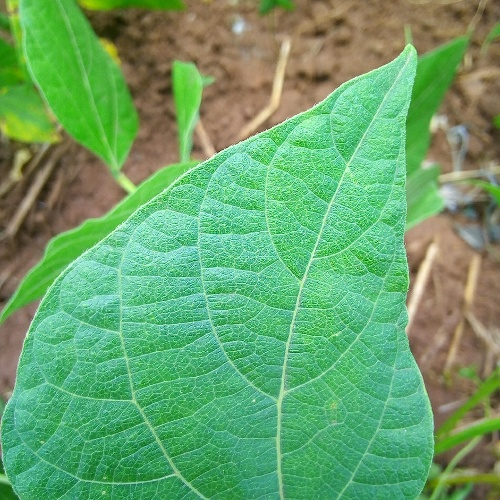

In [ ]:
display(Image('beans/train/healthy/healthy_train.0.jpg'))

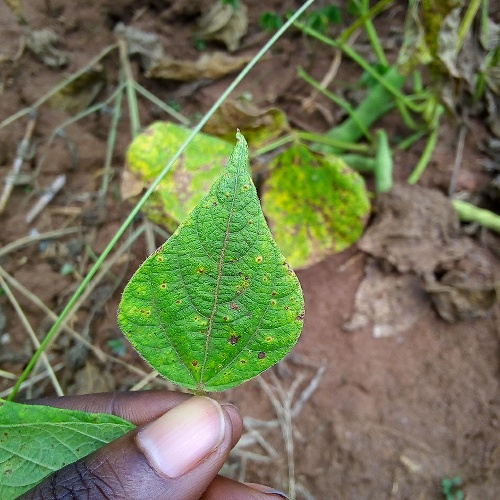

In [ ]:
display(Image('beans/train/bean_rust/bean_rust_train.162.jpg'))

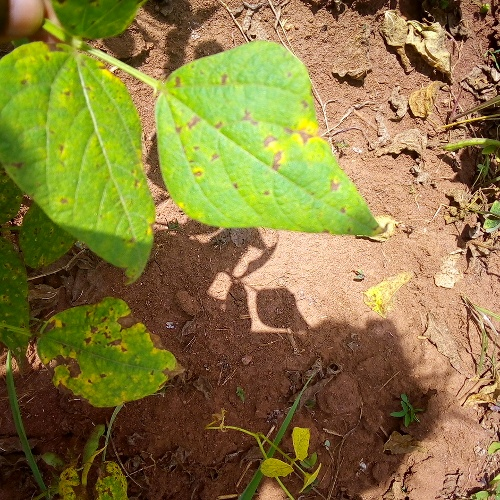

In [ ]:
display(Image('beans/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg'))

In [ ]:
batch_size = 128
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/train',
                                                               seed=111,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size)

Found 1034 files belonging to 3 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/test',
                                                               seed=111,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size)

Found 128 files belonging to 3 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/validation',
                                                               seed=111,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size)

Found 133 files belonging to 3 classes.
